In [14]:
from requests import get
import pandas as pd


In [15]:
all_countries=get('https://raw.githubusercontent.com/everypolitician/everypolitician-data/master/countries.json')
j=all_countries.json()
len(j)

233

In [16]:
aus_hr_url=j[13]['legislatures'][0]['popolo_url']
aus_hr_data=get(aus_hr_url)
aus_hr_df=pd.json_normalize(aus_hr_data.json()['persons'])
aus_hr_data.json()

{'posts': [],
 'persons': [{'birth_date': '1954-03-21',
   'contact_details': [{'type': 'twitter', 'value': 'nueday'}],
   'family_name': 'Kelly',
   'gender': 'female',
   'given_name': 'De-Anne',
   'id': '004e5075-34b7-4ba5-b53b-f992a28ea6dc',
   'identifiers': [{'identifier': '10357', 'scheme': 'everypolitician_legacy'},
    {'identifier': '/m/02r6hn', 'scheme': 'freebase'},
    {'identifier': '10357', 'scheme': 'openaustralia'},
    {'identifier': 'Q5243805', 'scheme': 'wikidata'}],
   'links': [{'note': 'Wikipedia (en)',
     'url': 'https://en.wikipedia.org/wiki/De-Anne_Kelly'},
    {'note': 'twitter', 'url': 'https://twitter.com/nueday'},
    {'note': 'wikipedia',
     'url': 'http://en.wikipedia.org/wiki/De-Anne_Kelly'}],
   'name': 'De-Anne Kelly',
   'sort_name': 'Kelly, De-Anne'},
  {'birth_date': '1925-06-15',
   'death_date': '2017-11-28',
   'family_name': 'Millar',
   'gender': 'male',
   'given_name': 'Percival',
   'id': '00c2ed39-73db-43aa-a5b7-bea4508dbd5e',
   'ide

In [17]:
aus_hr_df['birth_date']=pd.to_datetime(aus_hr_df['birth_date'])
aus_hr_df.head()

,birth_date,contact_details,family_name,gender,given_name,id,identifiers,links,name,sort_name,death_date,other_names,email,image,images,honorific_prefix
0,1954-03-21,"[{'type': 'twitter', 'value': 'nueday'}]",Kelly,female,De-Anne,004e5075-34b7-4ba5-b53b-f992a28ea6dc,"[{'identifier': '10357', 'scheme': 'everypolit...","[{'note': 'Wikipedia (en)', 'url': 'https://en...",De-Anne Kelly,"Kelly, De-Anne",NaN,NaN,NaN,NaN,NaN,NaN
1,1925-06-15,NaN,Millar,male,Percival,00c2ed39-73db-43aa-a5b7-bea4508dbd5e,"[{'identifier': '10457', 'scheme': 'everypolit...","[{'note': 'Wikipedia (en)', 'url': 'https://en...",Percival Millar,"Millar, Percival",2017-11-28,"[{'lang': 'en', 'name': 'Clarrie Millar', 'not...",NaN,NaN,NaN,NaN
2,1951-07-04,"[{'type': 'email', 'value': 'john.alexander.mp...",Alexander,male,John,010ba615-63c1-466b-a425-5d127e12b8c3,"[{'identifier': 'M3M', 'scheme': 'aph'}, {'ide...","[{'note': 'Wikimedia Commons', 'url': 'https:/...",John Alexander,"Alexander, John",NaN,"[{'lang': 'ar', 'name': 'جون ألكسندر', 'note':...",john.alexander.mp@aph.gov.au,http://www.aph.gov.au//api/parliamentarian/M3M...,[{'url': 'http://www.aph.gov.au//api/parliamen...,NaN
3,1954-02-13,"[{'type': 'twitter', 'value': 'senronno'}]",Ronaldson,male,Michael,012988dd-b93f-4bfe-95b8-27f3e5a56ee7,"[{'identifier': 'xt4', 'scheme': 'aph'}, {'ide...","[{'note': 'Wikipedia (en)', 'url': 'https://en...",Michael Ronaldson,"Ronaldson, Michael",NaN,"[{'lang': 'ja', 'name': 'マイケル・ロナルドソン', 'note':...",NaN,NaN,NaN,NaN
4,1946-08-28,NaN,Andren,male,Peter,0267b78a-440a-414f-bf35-5284b9ebaa0d,"[{'identifier': '10012', 'scheme': 'everypolit...","[{'note': 'Wikipedia (en)', 'url': 'https://en...",Peter Andren,"Andren, Peter",2007-11-03,NaN,NaN,NaN,NaN,NaN


In [18]:
aus_hr_df.shape

(515, 16)

In [19]:
aus_hr_df['birth_date']=pd.to_datetime(aus_hr_df['birth_date'])
monthly_df=aus_hr_df.groupby(aus_hr_df['birth_date'].dt.month).count()[['name']]
monthly_df.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_df['percentage']=(monthly_df['name']/monthly_df['name'].sum()*100).round(1).astype(str) + '%'
monthly_df.rename(columns={'name':'count'},inplace=True)
monthly_df.transpose()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,45,38,52,44,40,46,47,41,43,43,38,38
percentage,8.7%,7.4%,10.1%,8.5%,7.8%,8.9%,9.1%,8.0%,8.3%,8.3%,7.4%,7.4%


In [20]:
# Functions to get country and legislature wise data

def get_legislature_data(link):
    data=get(link)
    df=pd.json_normalize(data.json()['persons'])
    return df

def get_country_data(country):
    df=pd.concat([get_legislature_data(legislature['popolo_url']) for legislature in country['legislatures']])
    df['country']=country['name']
    return df

In [21]:
# Create a dataframe with data for all countries
df=pd.concat([get_country_data(country) for country in j])
df

,gender,id,identifiers,image,images,name,birth_date,links,other_names,given_name,...,contact_details,family_name,death_date,email,sort_name,honorific_prefix,honorific_suffix,national_identity,summary,patronymic_name
0,female,0a93b26d-ebc5-44f5-b4fa-935ae209620f,"[{'identifier': '127', 'scheme': 'everypolitic...",http://www.parlamentra.org/upload/iblock/d1a/g...,[{'url': 'http://www.parlamentra.org/upload/ib...,Гамисония Эмма Алексеевна,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,male,0ac7e64e-b723-4bdb-85f6-81ff217a70fa,"[{'identifier': '211', 'scheme': 'everypolitic...",http://www.parlamentra.org/upload/iblock/4dd/I...,[{'url': 'http://www.parlamentra.org/upload/ib...,Барганджия Гурам Юрьевич,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,male,0b515281-445d-49dd-9044-d886d85f0970,"[{'identifier': '157', 'scheme': 'everypolitic...",http://www.parlamentra.org/upload/iblock/244/c...,[{'url': 'http://www.parlamentra.org/upload/ib...,Чамагуа Леонид Михайлович,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,male,12d1a33c-daa4-496c-965a-4cd4749eda78,"[{'identifier': '130', 'scheme': 'everypolitic...",http://www.parlamentra.org/upload/iblock/c3b/t...,[{'url': 'http://www.parlamentra.org/upload/ib...,Цвижба Отари Шотович,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,male,15a55ab3-c81c-4f5f-ae75-ea5446dd5ef6,"[{'identifier': '138', 'scheme': 'everypolitic...",http://www.parlamentra.org/upload/iblock/30b/y...,[{'url': 'http://www.parlamentra.org/upload/ib...,Язычба Заур Гайдарович,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,male,ed4838aa-19f8-493c-b8c4-58780b5b0d84,"[{'identifier': '112', 'scheme': 'everypolitic...",http://www.lagtinget.ax/files/sjolund_folke.jpg,[{'url': 'http://www.lagtinget.ax/files/sjolun...,Sjölund Folke,1943-12-16,"[{'note': 'Wikipedia (fi)', 'url': 'https://fi...","[{'lang': 'en', 'name': 'Folke Sjölund', 'note...",Folke,...,NaN,Sjölund,2013-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,male,f105a4a0-5fef-4be7-ab73-9376923491a7,NaN,https://www.lagtinget.ax/sites/www.lagtinget.a...,[{'url': 'https://www.lagtinget.ax/sites/www.l...,John Holmberg,1967,NaN,NaN,NaN,...,"[{'type': 'email', 'value': 'john.holmberg@lag...",NaN,NaN,john.holmberg@lagtinget.ax,NaN,NaN,NaN,NaN,NaN,NaN
57,male,f4f995ae-126c-468f-8f26-deec1e26adc2,"[{'identifier': '372', 'scheme': 'everypolitic...",http://www.lagtinget.ax/files/asumaa_tony.jpg,[{'url': 'http://www.lagtinget.ax/files/asumaa...,Asumaa Tony,1968-09-15,"[{'note': 'Wikipedia (en)', 'url': 'https://en...","[{'lang': 'en', 'name': 'Tony Asumaa', 'note':...",Tony,...,NaN,Asumaa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,male,fe40bb08-5025-473d-af52-bf1e30ecc5e6,"[{'identifier': '88', 'scheme': 'everypolitici...",http://www.lagtinget.ax/files/sundblom_torsten...,[{'url': 'http://www.lagtinget.ax/files/sundbl...,Sundblom Torsten,1951-09-15,"[{'note': 'Wikipedia (fi)', 'url': 'https://fi...","[{'lang': 'en', 'name': 'Torsten Sundblom', 'n...",Torsten,...,"[{'type': 'email', 'value': 'torsten.sundblom@...",NaN,NaN,torsten.sundblom@lagtinget.ax,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.to_csv('../data/data.csv',index=True)

# Part 2


In [24]:
df=pd.read_csv('../data/data.csv')

C:\Users\Ojas\AppData\Local\Temp\ipykernel_20284\4066015073.py:1: DtypeWarning: Columns (18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('../data/data.csv')


In [25]:
#Using string parsing to remove Jan skew
df['month']=df['birth_date'].astype(str).apply(lambda x: x[5:7])


In [26]:
monthly_df=df.groupby(df['month']).count()[['name']]
monthly_df.index=['Bad Data','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_df['percentage']=(monthly_df['name']/monthly_df['name'].sum()*100).round(1).astype(str) + '%'
monthly_df.rename(columns={'name':'count'},inplace=True)
monthly_df.transpose()

,Bad Data,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,34190,4876,3338,3742,3611,3724,3648,3657,3705,3602,3497,3337,3455
percentage,43.6%,6.2%,4.3%,4.8%,4.6%,4.8%,4.7%,4.7%,4.7%,4.6%,4.5%,4.3%,4.4%


In [27]:
#Previous implementation with January skew
#df['birth_date']=pd.to_datetime(df['birth_date'], errors='coerce') #y-m-d
#monthly_df=df.groupby(df['birth_date'].dt.month).count()[['name']]
#monthly_df.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#monthly_df['percentage']=(monthly_df['name']/monthly_df['name'].sum()*100).round(1).astype(str) + '%'
#monthly_df.rename(columns={'name':'count'},inplace=True)
#monthly_df.transpose()

In [28]:
monthly_df.drop('Bad Data',inplace=True)
monthly_df['percentage']=(monthly_df['count']/monthly_df['count'].sum()*100).round(2).astype(str) + '%'
monthly_df

,count,percentage
Jan,4876,11.03%
Feb,3338,7.55%
Mar,3742,8.47%
Apr,3611,8.17%
May,3724,8.43%
Jun,3648,8.25%
Jul,3657,8.28%
Aug,3705,8.38%
Sep,3602,8.15%
Oct,3497,7.91%


In [29]:
monthly_df['expected']=[31/365,28/365,31/365,30/365,31/365,30/365,31/365,31/365,30/365,31/365,30/365,31/365]
monthly_df['expected']=(monthly_df['expected']/monthly_df['expected'].sum()*100).round(2).astype(str) + '%'
monthly_df

,count,percentage,expected
Jan,4876,11.03%,8.49%
Feb,3338,7.55%,7.67%
Mar,3742,8.47%,8.49%
Apr,3611,8.17%,8.22%
May,3724,8.43%,8.49%
Jun,3648,8.25%,8.22%
Jul,3657,8.28%,8.49%
Aug,3705,8.38%,8.49%
Sep,3602,8.15%,8.22%
Oct,3497,7.91%,8.49%


In [30]:
births_data=pd.read_csv('../data/Births Data UN.csv')
births_data

,Country or Area,Year,Area,Month,Record Type,Reliability,Source Year,Value,Value Footnotes
0,Åland Islands,2021.0,Total,Total,Data tabulated by year of occurrence,Provisional figure,2022.0,293.0,NaN
1,Åland Islands,2021.0,Total,January - March,Data tabulated by year of occurrence,Provisional figure,2021.0,70.0,NaN
2,Åland Islands,2021.0,Total,April - June,Data tabulated by year of occurrence,Provisional figure,2021.0,73.0,NaN
3,Åland Islands,2021.0,Total,July - September,Data tabulated by year of occurrence,Provisional figure,2021.0,82.0,NaN
4,Åland Islands,2021.0,Total,October - December,Data tabulated by year of occurrence,Provisional figure,2022.0,68.0,NaN
...,...,...,...,...,...,...,...,...,...
54844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
births_data.drop(['Area', 'Record Type', 'Value Footnotes', 'Source Year'],axis=1,inplace=True)
births_data

,Country or Area,Year,Month,Reliability,Value
0,Åland Islands,2021.0,Total,Provisional figure,293.0
1,Åland Islands,2021.0,January - March,Provisional figure,70.0
2,Åland Islands,2021.0,April - June,Provisional figure,73.0
3,Åland Islands,2021.0,July - September,Provisional figure,82.0
4,Åland Islands,2021.0,October - December,Provisional figure,68.0
...,...,...,...,...,...
54844,NaN,NaN,NaN,NaN,NaN
54845,NaN,NaN,NaN,NaN,NaN
54846,NaN,NaN,NaN,NaN,NaN
54847,NaN,NaN,NaN,NaN,NaN


In [32]:
births_data=births_data.query("Month in ['January','February','March','April','May','June','July','August','September','October','November','December']")
births_data

,Country or Area,Year,Month,Reliability,Value
6,Åland Islands,2020.0,January,"Final figure, complete",11.0
7,Åland Islands,2020.0,February,"Final figure, complete",24.0
8,Åland Islands,2020.0,March,"Final figure, complete",31.0
9,Åland Islands,2020.0,April,"Final figure, complete",22.0
10,Åland Islands,2020.0,May,"Final figure, complete",20.0
...,...,...,...,...,...
54796,Wallis and Futuna Islands,1973.0,August,"Final figure, complete",364.0
54797,Wallis and Futuna Islands,1973.0,September,"Final figure, complete",300.0
54798,Wallis and Futuna Islands,1973.0,October,"Final figure, complete",385.0
54799,Wallis and Futuna Islands,1973.0,November,"Final figure, complete",344.0


In [33]:
births_df=births_data.groupby('Month').sum()[['Value']]
births_df

,Value
Month,
April,8.449080e+07
August,9.257204e+07
December,8.634094e+07
February,8.228612e+07
January,9.274157e+07
July,9.187408e+07
June,8.627537e+07
March,8.805267e+07
May,8.731629e+07


In [34]:
births_df=births_df.reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])

In [35]:
births_df.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
births_df

,Value
Jan,9.274157e+07
Feb,8.228612e+07
Mar,8.805267e+07
Apr,8.449080e+07
May,8.731629e+07
Jun,8.627537e+07
Jul,9.187408e+07
Aug,9.257204e+07
Sep,9.286552e+07
Oct,9.115465e+07


In [36]:
births_df['births_percentage']=(births_df['Value']/births_df['Value'].sum()*100).round(2).astype(str) + '%'
births_df.rename(columns={'Value':'births_count'},inplace=True)
births_df.drop('births_count',axis=1,inplace=True)

In [37]:
df=pd.merge(monthly_df,births_df,how='inner',left_index=True,right_index=True)
df

,count,percentage,expected,births_percentage
Jan,4876,11.03%,8.49%,8.73%
Feb,3338,7.55%,7.67%,7.75%
Mar,3742,8.47%,8.49%,8.29%
Apr,3611,8.17%,8.22%,7.95%
May,3724,8.43%,8.49%,8.22%
Jun,3648,8.25%,8.22%,8.12%
Jul,3657,8.28%,8.49%,8.65%
Aug,3705,8.38%,8.49%,8.72%
Sep,3602,8.15%,8.22%,8.74%
Oct,3497,7.91%,8.49%,8.58%


In [38]:
df['percentage']=df['percentage'].str.replace('%','').astype(float)
df['births_percentage']=df['births_percentage'].str.replace('%','').astype(float)
df['expected']=df['expected'].str.replace('%','').astype(float)
df['difference']=df['percentage']-df['births_percentage']
df['pc_difference']=df['difference']/df['births_percentage']*100
df['pc_difference']=df['pc_difference'].round(2)
df.index=pd.CategoricalIndex(df.index, categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ordered=True)
df

,count,percentage,expected,births_percentage,difference,pc_difference
Jan,4876,11.03,8.49,8.73,2.30,26.35
Feb,3338,7.55,7.67,7.75,-0.20,-2.58
Mar,3742,8.47,8.49,8.29,0.18,2.17
Apr,3611,8.17,8.22,7.95,0.22,2.77
May,3724,8.43,8.49,8.22,0.21,2.55
Jun,3648,8.25,8.22,8.12,0.13,1.60
Jul,3657,8.28,8.49,8.65,-0.37,-4.28
Aug,3705,8.38,8.49,8.72,-0.34,-3.90
Sep,3602,8.15,8.22,8.74,-0.59,-6.75
Oct,3497,7.91,8.49,8.58,-0.67,-7.81


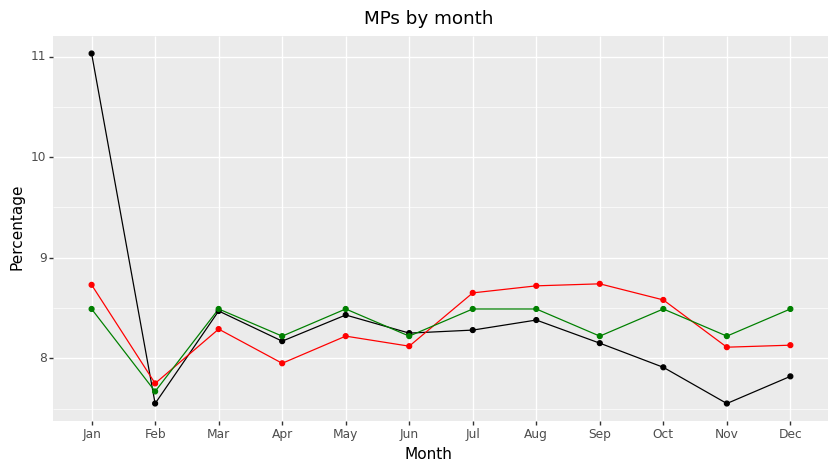

<ggplot: (123306471924)>

In [39]:
from plotnine import *
g1=ggplot(df,aes(x='df.index',y='percentage', group=1)) + geom_line() + geom_line(aes(y='births_percentage'),color='red') + geom_line(aes(y='expected'),color='green') + geom_point(aes(y='percentage'),color='black') + geom_point(aes(y='births_percentage'),color='red') + geom_point(aes(y='expected'),color='green')  + scale_x_discrete(limits=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']) + labs(title='MPs by month',x='Month',y='Percentage') + theme(figure_size=(10,5))
g1

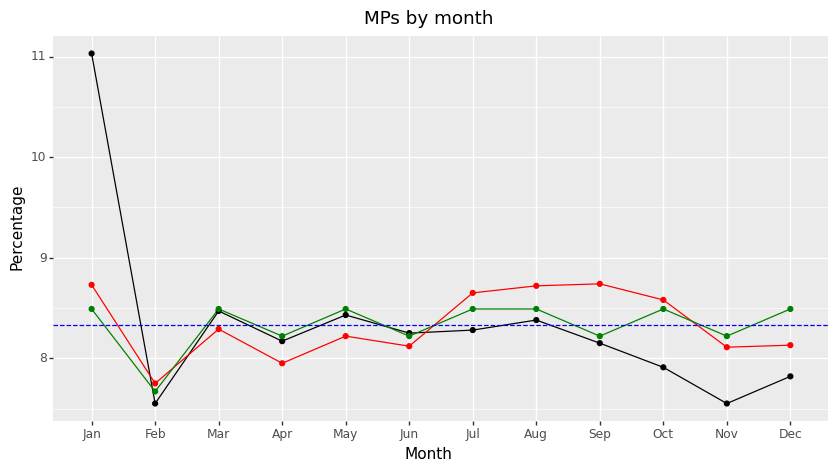

<ggplot: (123268312727)>

In [40]:
g1+geom_hline(yintercept=8.33,linetype='dashed',color='blue')

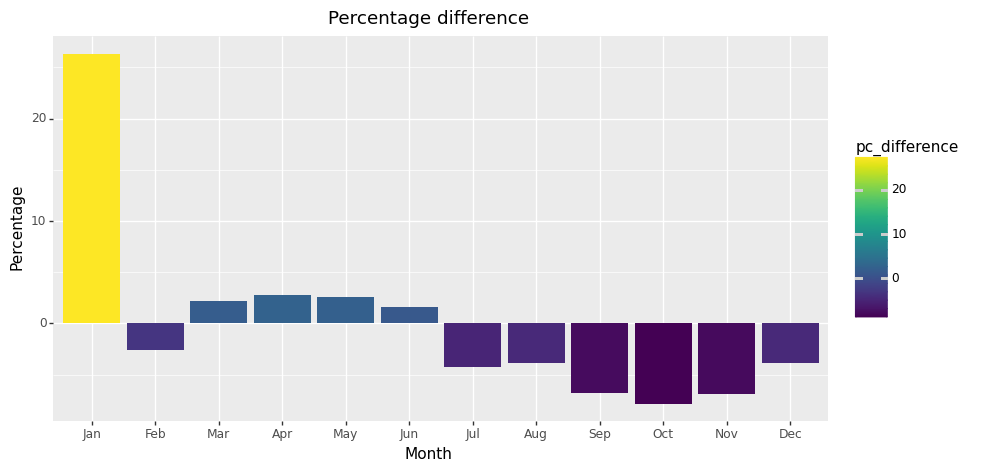

<ggplot: (123307039841)>

In [41]:
ggplot(df,aes(x='df.index',y='pc_difference', fill='pc_difference')) + geom_bar(stat='identity') + labs(title='Percentage difference',x='Month',y='Percentage') + theme(figure_size=(10,5))

In [42]:
# Alternative method to remove Jan skew using pandas without string parsing

df2=pd.read_csv('../data/data.csv')
df2=df2[df2.birth_date.str.len()==10]
df2

C:\Users\Ojas\AppData\Local\Temp\ipykernel_20284\2741105576.py:3: DtypeWarning: Columns (18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.


,Unnamed: 0,gender,id,identifiers,image,images,name,birth_date,links,other_names,...,contact_details,family_name,death_date,email,sort_name,honorific_prefix,honorific_suffix,national_identity,summary,patronymic_name
8,8,male,34352d83-6fa1-463d-a02f-6157b3adf36b,"[{'identifier': '141', 'scheme': 'everypolitic...",http://www.parlamentra.org/upload/iblock/bfe/u...,[{'url': 'http://www.parlamentra.org/upload/ib...,Убирия Бежан Михайлович,1967-03-07,"[{'note': 'Wikipedia (ru)', 'url': 'https://ru...","[{'name': 'Бежан Убириа', 'note': 'alternate'}...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,19,male,9fd33b27-fd4c-4eba-9a8f-d4d23f603c63,"[{'identifier': '/m/03fqqs', 'scheme': 'freeba...",http://www.parlamentra.org/upload/iblock/e1f/s...,[{'url': 'http://www.parlamentra.org/upload/ib...,Шамба Сергей Миронович,1951-03-15,"[{'note': 'Wikipedia (ab)', 'url': 'https://ab...","[{'lang': 'ab', 'name': 'Сергеи Шамба', 'note'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,28,male,da988bab-32d4-46c0-bb7b-5c6a6eb129e7,"[{'identifier': '46', 'scheme': 'everypolitici...",http://www.parlamentra.org/upload/iblock/b85/%...,[{'url': 'http://www.parlamentra.org/upload/ib...,Бганба Валерий Рамшухович,1953-08-26,"[{'note': 'Wikimedia Commons', 'url': 'https:/...","[{'lang': 'cs', 'name': 'Valerij Bganba', 'not...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,78,female,522dff9d-d21d-41b9-a7d5-c2321c819b11,"[{'identifier': '1854', 'scheme': 'everypoliti...",http://www.wolesi.website/Media/Images/mine/fa...,[{'url': 'http://www.wolesi.website/Media/Imag...,Farkhunda Zahra Naderi-Kabul,1981-04-19,"[{'note': 'Wikimedia Commons', 'url': 'https:/...","[{'lang': 'en', 'name': 'Farkhunda Zahra Nader...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,172,female,aac6f415-446d-4070-80d9-195d4f7b77ac,"[{'identifier': '1823', 'scheme': 'everypoliti...",http://www.wolesi.website/Media/Images/mine/ra...,[{'url': 'http://www.wolesi.website/Media/Imag...,Rangina Kargar-Faryab,1985-03-22,"[{'note': 'Wikimedia Commons', 'url': 'https:/...","[{'lang': 'en', 'name': 'Rangina Kargar', 'not...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78373,51,female,e57828f1-e51a-41ea-a61b-7fc1b92e2b37,"[{'identifier': '109', 'scheme': 'everypolitic...",http://www.lagtinget.ax/files/dahl_ulla_britt.jpg,[{'url': 'http://www.lagtinget.ax/files/dahl_u...,Dahl Ulla-Britt,1946-03-14,"[{'note': 'Wikipedia (fi)', 'url': 'https://fi...","[{'lang': 'en', 'name': 'Ulla-Britt Dahl', 'no...",...,NaN,Dahl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78374,52,male,e6f6e01b-bcb0-4374-8912-7e1eaf492f10,"[{'identifier': '97', 'scheme': 'everypolitici...",http://www.lagtinget.ax/files/lindfors_henry.jpg,[{'url': 'http://www.lagtinget.ax/files/lindfo...,Lindström Henry,1956-06-20,"[{'note': 'Wikipedia (fi)', 'url': 'https://fi...","[{'lang': 'en', 'name': 'Henry Lindström', 'no...",...,NaN,Lindström,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78377,55,male,ed4838aa-19f8-493c-b8c4-58780b5b0d84,"[{'identifier': '112', 'scheme': 'everypolitic...",http://www.lagtinget.ax/files/sjolund_folke.jpg,[{'url': 'http://www.lagtinget.ax/files/sjolun...,Sjölund Folke,1943-12-16,"[{'note': 'Wikipedia (fi)', 'url': 'https://fi...","[{'lang': 'en', 'name': 'Folke Sjölund', 'note...",...,NaN,Sjölund,2013-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78379,57,male,f4f995ae-126c-468f-8f26-deec1e26adc2,"[{'identifier': '372', 'scheme': 'everypolitic...",http://www.lagtinget.ax/files/asumaa_tony.jpg,[{'url': 'http://www.lagtinget.ax/files/asumaa...,Asumaa Tony,1968-09-15,"[{'note': 'Wikipedia (en)', 'url': 'https://en...","[{'lang': 'en', 'name': 'Tony Asumaa', 'note':...",...,NaN,Asumaa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df2['birth_date']=pd.to_datetime(df2['birth_date'], errors='coerce') #y-m-d
monthly_df=df2.groupby(df2['birth_date'].dt.month).count()[['name']]
monthly_df.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_df['percentage']=(monthly_df['name']/monthly_df['name'].sum()*100).round(1).astype(str) + '%'
monthly_df.rename(columns={'name':'count'},inplace=True)
monthly_df.transpose()

# It works equally well and is more efficient

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,4855,3328,3732,3598,3706,3633,3638,3685,3580,3475,3313,3430
percentage,11.0%,7.6%,8.5%,8.2%,8.4%,8.3%,8.3%,8.4%,8.1%,7.9%,7.5%,7.8%


In [48]:
df_jan=df2.query("birth_date.dt.month==1")
df_01_01=df_jan.query("birth_date.dt.day==1")
df_01_01

,Unnamed: 0,gender,id,identifiers,image,images,name,birth_date,links,other_names,...,contact_details,family_name,death_date,email,sort_name,honorific_prefix,honorific_suffix,national_identity,summary,patronymic_name
451,158,male,98284c6f-4b8e-4537-bdfe-dba9aefc83e3,"[{'identifier': 'Q9168623', 'scheme': 'everypo...",https://www.parlament.al/wp-content/uploads/20...,[{'url': 'https://www.parlament.al/wp-content/...,Ben Blushi,1969-01-01,"[{'note': 'Wikipedia (de)', 'url': 'https://de...","[{'lang': 'hy', 'name': 'Բեն Բլուշի', 'note': ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487,194,NaN,b676f004-4f4c-41dc-b903-d520e3752fbf,NaN,http://www.parlament.al/Files/AnetareFoto/vikt...,[{'url': 'http://www.parlament.al/Files/Anetar...,VIKTOR TUSHAJ,1962-01-01,NaN,NaN,...,"[{'type': 'email', 'value': 'viktor.tushaj@par...",TUSHAJ,NaN,viktor.tushaj@parlament.al,TUSHAJ VIKTOR,NaN,NaN,NaN,NaN,NaN
1653,104,female,48994f44-dc69-49b6-ab9b-1d8910df29d7,"[{'identifier': 'ilotto', 'scheme': 'argentine...",https://upload.wikimedia.org/wikipedia/commons...,[{'url': 'https://upload.wikimedia.org/wikiped...,Ines Beatriz Lotto,1953-01-01,"[{'note': 'Wikipedia (es)', 'url': 'https://es...","[{'name': 'Inés Beatriz Lotto Vecchietti', 'no...",...,NaN,NaN,NaN,NaN,"Lotto, Ines Beatriz",NaN,NaN,NaN,NaN,NaN
2057,39,male,28e5596b-2495-4633-958d-a75338301842,"[{'identifier': '977', 'scheme': 'armenian_par...",http://parliament.am/photo.php?source=deputy&s...,[{'url': 'http://parliament.am/photo.php?sourc...,Gagik Melikyan,1960-01-01,"[{'note': 'Wikipedia (ru)', 'url': 'https://ru...","[{'name': 'Գագիկ Մելիքյան', 'note': 'alternate...",...,NaN,Melikyan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2141,123,NaN,760174ea-8303-4a24-b8c0-18bf41bde53b,NaN,http://parliament.am/photo.php?source=deputy&s...,[{'url': 'http://parliament.am/photo.php?sourc...,Vagharshak Hakobyan,1991-01-01,NaN,"[{'lang': 'hy', 'name': 'Վաղարշակ Սոսի Հակոբյա...",...,"[{'type': 'email', 'value': 'vagharshak.hakoby...",NaN,NaN,vagharshak.hakobyan@parliament.am,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77759,298,male,fc7914d1-c7e2-45aa-9c84-4cdd79bdcd44,"[{'identifier': '66', 'scheme': 'everypolitici...",http://www.ypwatch.org/upimages/members/66.jpg,[{'url': 'http://www.ypwatch.org/upimages/memb...,سلطان حزام شمسان العتواني,1952-01-01,"[{'note': 'Wikipedia (ar)', 'url': 'https://ar...","[{'lang': 'ar', 'name': 'سلطان العتواني', 'not...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77792,29,male,219eea5b-c197-4d5f-9e98-3c941bd2aa23,"[{'identifier': '374', 'scheme': 'everypolitic...",http://www.parliament.gov.zm/sites/default/fil...,[{'url': 'http://www.parliament.gov.zm/sites/d...,Mundia Ndalamei,1964-01-01,NaN,NaN,...,"[{'type': 'email', 'value': 'mndalamei@parliam...",NaN,NaN,mndalamei@parliament.gov.zm,NaN,NaN,NaN,NaN,NaN,NaN
77840,77,male,54f2a985-e857-4e29-8d6d-d5dd3f8d876c,"[{'identifier': '404', 'scheme': 'everypolitic...",http://www.parliament.gov.zm/sites/default/fil...,[{'url': 'http://www.parliament.gov.zm/sites/d...,Chomba Freedom Sikazwe,1961-01-01,"[{'note': 'Wikipedia (de)', 'url': 'https://de...","[{'lang': 'en', 'name': 'Chomba Sikazwe', 'not...",...,"[{'type': 'email', 'value': 'fsikazwe@parliame...",NaN,NaN,fsikazwe@parliament.gov.zm,NaN,NaN,NaN,NaN,NaN,NaN
77856,93,male,63c28ebd-9fb4-48cc-a825-60ca0cb9fe0b,"[{'identifier': '321', 'scheme': 'everypolitic...",http://www.parliament.gov.zm/sites/default/fil...,[{'url': 'http://www.parliament.gov.zm/sites/d...,Clive Darius Miyanda,1960-01-01,NaN,"[{'lang': 'en', 'name': 'Clive Miyanda', 'note...",...,"[{'type': 'email', 'value': 'cdmiyanda@parliam...",NaN,NaN,cdmiyanda@parliament.gov.zm,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
num_01_01=df_01_01.groupby('country').count()['name']
num_total=df2.groupby('country').count()[['name']]
df3=pd.merge(num_01_01,num_total,how='inner',left_index=True,right_index=True)
df3['ratio']=df3['name_x']/df3['name_y']*100
df_excluded=df3[df3['ratio']>2.7]
df_excluded=df_excluded[df_excluded['name_x']>10]
df_excluded.rename(columns={'name_x':'1 Jan','name_y':'Total', 'ratio':'Percentage'},inplace=True)
df_excluded

,1 Jan,Total,Percentage
country,,,
Bangladesh,18,252,7.142857
Cameroon,286,644,44.409938
Pakistan,32,244,13.114754
Portugal,51,1479,3.448276
Syria,269,274,98.175182
Turkey,397,1128,35.195035
Yemen,15,52,28.846154


In [70]:
df4=pd.read_csv('../data/data.csv')
df_included=df4[~df4['country'].isin(df_excluded.index)]
df_included

C:\Users\Ojas\AppData\Local\Temp\ipykernel_20284\129391936.py:1: DtypeWarning: Columns (18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.


,Unnamed: 0,gender,id,identifiers,image,images,name,birth_date,links,other_names,...,contact_details,family_name,death_date,email,sort_name,honorific_prefix,honorific_suffix,national_identity,summary,patronymic_name
0,0,female,0a93b26d-ebc5-44f5-b4fa-935ae209620f,"[{'identifier': '127', 'scheme': 'everypolitic...",http://www.parlamentra.org/upload/iblock/d1a/g...,[{'url': 'http://www.parlamentra.org/upload/ib...,Гамисония Эмма Алексеевна,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,male,0ac7e64e-b723-4bdb-85f6-81ff217a70fa,"[{'identifier': '211', 'scheme': 'everypolitic...",http://www.parlamentra.org/upload/iblock/4dd/I...,[{'url': 'http://www.parlamentra.org/upload/ib...,Барганджия Гурам Юрьевич,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,male,0b515281-445d-49dd-9044-d886d85f0970,"[{'identifier': '157', 'scheme': 'everypolitic...",http://www.parlamentra.org/upload/iblock/244/c...,[{'url': 'http://www.parlamentra.org/upload/ib...,Чамагуа Леонид Михайлович,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,male,12d1a33c-daa4-496c-965a-4cd4749eda78,"[{'identifier': '130', 'scheme': 'everypolitic...",http://www.parlamentra.org/upload/iblock/c3b/t...,[{'url': 'http://www.parlamentra.org/upload/ib...,Цвижба Отари Шотович,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,male,15a55ab3-c81c-4f5f-ae75-ea5446dd5ef6,"[{'identifier': '138', 'scheme': 'everypolitic...",http://www.parlamentra.org/upload/iblock/30b/y...,[{'url': 'http://www.parlamentra.org/upload/ib...,Язычба Заур Гайдарович,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78377,55,male,ed4838aa-19f8-493c-b8c4-58780b5b0d84,"[{'identifier': '112', 'scheme': 'everypolitic...",http://www.lagtinget.ax/files/sjolund_folke.jpg,[{'url': 'http://www.lagtinget.ax/files/sjolun...,Sjölund Folke,1943-12-16,"[{'note': 'Wikipedia (fi)', 'url': 'https://fi...","[{'lang': 'en', 'name': 'Folke Sjölund', 'note...",...,NaN,Sjölund,2013-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78378,56,male,f105a4a0-5fef-4be7-ab73-9376923491a7,NaN,https://www.lagtinget.ax/sites/www.lagtinget.a...,[{'url': 'https://www.lagtinget.ax/sites/www.l...,John Holmberg,1967,NaN,NaN,...,"[{'type': 'email', 'value': 'john.holmberg@lag...",NaN,NaN,john.holmberg@lagtinget.ax,NaN,NaN,NaN,NaN,NaN,NaN
78379,57,male,f4f995ae-126c-468f-8f26-deec1e26adc2,"[{'identifier': '372', 'scheme': 'everypolitic...",http://www.lagtinget.ax/files/asumaa_tony.jpg,[{'url': 'http://www.lagtinget.ax/files/asumaa...,Asumaa Tony,1968-09-15,"[{'note': 'Wikipedia (en)', 'url': 'https://en...","[{'lang': 'en', 'name': 'Tony Asumaa', 'note':...",...,NaN,Asumaa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78380,58,male,fe40bb08-5025-473d-af52-bf1e30ecc5e6,"[{'identifier': '88', 'scheme': 'everypolitici...",http://www.lagtinget.ax/files/sundblom_torsten...,[{'url': 'http://www.lagtinget.ax/files/sundbl...,Sundblom Torsten,1951-09-15,"[{'note': 'Wikipedia (fi)', 'url': 'https://fi...","[{'lang': 'en', 'name': 'Torsten Sundblom', 'n...",...,"[{'type': 'email', 'value': 'torsten.sundblom@...",NaN,NaN,torsten.sundblom@lagtinget.ax,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df_included.to_csv('../data/data_included.csv',index=True)

In [45]:
df.loc['Jan', 'count'] = (df.loc['Jan', 'count'] - (df_jan.query("birth_date.dt.day==1").shape[0]))*31/30
df.loc['Jan', 'count'] = df.loc['Jan', 'count'].round(0)
df

,count,percentage,expected,births_percentage,difference,pc_difference
Jan,3662.0,11.03,8.49,8.73,2.30,26.35
Feb,3338.0,7.55,7.67,7.75,-0.20,-2.58
Mar,3742.0,8.47,8.49,8.29,0.18,2.17
Apr,3611.0,8.17,8.22,7.95,0.22,2.77
May,3724.0,8.43,8.49,8.22,0.21,2.55
Jun,3648.0,8.25,8.22,8.12,0.13,1.60
Jul,3657.0,8.28,8.49,8.65,-0.37,-4.28
Aug,3705.0,8.38,8.49,8.72,-0.34,-3.90
Sep,3602.0,8.15,8.22,8.74,-0.59,-6.75
Oct,3497.0,7.91,8.49,8.58,-0.67,-7.81


In [46]:
df['percentage']=(df['count']/df['count'].sum()*100).round(2)
df['difference']=df['percentage']-df['births_percentage']
df['pc_difference']=df['difference']/df['births_percentage']*100
df['pc_difference']=df['pc_difference'].round(2)
df

,count,percentage,expected,births_percentage,difference,pc_difference
Jan,3662.0,8.52,8.49,8.73,-0.21,-2.41
Feb,3338.0,7.77,7.67,7.75,0.02,0.26
Mar,3742.0,8.71,8.49,8.29,0.42,5.07
Apr,3611.0,8.40,8.22,7.95,0.45,5.66
May,3724.0,8.66,8.49,8.22,0.44,5.35
Jun,3648.0,8.49,8.22,8.12,0.37,4.56
Jul,3657.0,8.51,8.49,8.65,-0.14,-1.62
Aug,3705.0,8.62,8.49,8.72,-0.10,-1.15
Sep,3602.0,8.38,8.22,8.74,-0.36,-4.12
Oct,3497.0,8.14,8.49,8.58,-0.44,-5.13


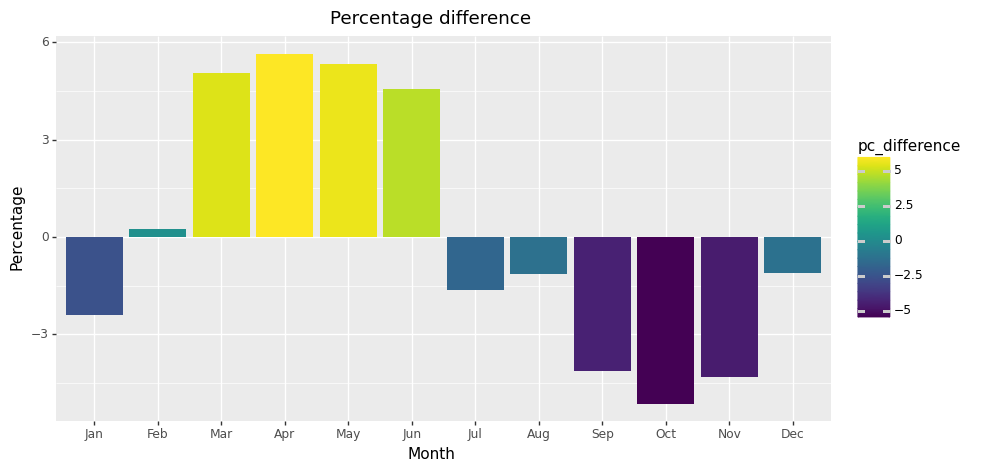

<ggplot: (123307066609)>

In [47]:
ggplot(df,aes(x='df.index',y='pc_difference', fill='pc_difference')) + geom_bar(stat='identity') + labs(title='Percentage difference',x='Month',y='Percentage') + theme(figure_size=(10,5))